# Fundamentals of Machine Learning - Exercise 4
* Goal of the excercise is to learn how to use **K-means** implementation in the Scikit-learn library to perform clustering and subsequent cluster analysis on a Titanic dataset.

## 🔎 Let's discuss the clustering topic a bit first
* What task do clustering algorithms solve?
* Do you know any examples of such algorithms?
* What are the limitation of clustering algorithms?

## 🔎 What is the **most difficult** of the clustering tasks?

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_04_meme_01.jpg?raw=true)

## 💡 But don't worry we will deal with the topic in several lectures 😊

## Import the libraries
*🔎  What is the **sklearn** library?

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# We will work with the famous Titanic dataset ⛵

## Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

* Dataset is available at https://www.kaggle.com/competitions/titanic'

## Load dataset
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/titanic.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/titanic.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How many missing values do we have in the data?

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0


## We are going to cluster the passangers into defined number of groups
* It is clear that it is mandatory to select only a relevant subset of features
    * Name the new DF as *df_clustering*
* 🔎 Is *Name* or *Ticket* relevant?
    * 'Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'

1. Select the features
2. Drop *NaN* values
3. Change type of *Sex* and *Embarked* to string
    * **astype()** function

In [ ]:
df_clustering=df[['Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()
df_clustering=df_clustering.dropna()
df_clustering.Sex=df_clustering.Sex.astype(str)
df_clustering.Embarked=df_clustering.Embarked.astype(str)
df_clustering.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Check *shape* and *dtypes*

In [ ]:
df_clustering.shape

(712, 8)

In [ ]:
df_clustering.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


# Print the dataset

## 🔎 Does everything seem OK?

In [ ]:
df_clustering

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,Q
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S


# We can see that not all features are numerical
* 🔎 Is it a problem?
    * Why?
* 🔎 How to deal with it?

## We have two basic encoding options
* Ordinal encoding vs. One-hot encoding
* What is the difference?
    * Is thete difference in dimensionality change? Why it can be an issue?
    * When is ordinal encoding appropriate?
    * Can you omit the pre-requirements of ordinal encoding sometimes?

## Lets encode categorical features
* https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
* https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing



In [ ]:
enc=sklearn.preprocessing.OrdinalEncoder()
enc.fit_transform(df_clustering[['Sex']])[:20]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

## 💡 You may ask why do we use the `dataframe[['feature_name']]` notation with double `[[` and `]]` brackets
* **Single brackets** pair around one variable name means that you want to select just the `pandas.Series` object

In [ ]:
df_clustering['Sex']

,Sex
PassengerId,
1,male
2,female
3,female
4,female
5,male
...,...
886,female
887,male
888,female


* **Double brackets** pair around one variable name created an output in the `pandas.DataFrame` format

In [ ]:
df_clustering[['Sex']]

,Sex
PassengerId,
1,male
2,female
3,female
4,female
5,male
...,...
886,female
887,male
888,female


## There is OneHotEncoder as well, however I recommend using `pd.get_dummies` method instead

In [ ]:
pd.get_dummies(df_clustering[['Embarked']]).head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True


## Let's finish the encoding part and create a new dataframe with encoded data
1. Create empty *df_encoded* dataframe with index using *df_clustering.index*
2. Create *Sex* variable with ordinal encoded data
3. Use `join` method for added one-hot encoded *Embarked* feature

In [ ]:
df_encoded=pd.DataFrame(index=df_clustering.index)


In [ ]:
df_encoded['Sex']=sklearn.preprocessing.OrdinalEncoder().fit_transform(df_clustering[['Sex']])

In [ ]:
df_encoded=df_encoded.join(pd.get_dummies(df_clustering[['Embarked']]))
df_encoded.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,1.0,False,False,True
2,0.0,True,False,False
3,0.0,False,False,True
4,0.0,False,False,True
5,1.0,False,False,True


# It is important to select the appropriate scaling method of the number features
* There are many ways how to do this - **MinMax, StandardScaler, PowerTransform, ...**
* This step heavily depends on a domain knowledge because the scales of the features have significant effect on a distances between couples of dataset instances
    - It is clear that if one variable is in range **(0,1)** and the second one is in a range **(5000, 10 000)**, the difference in the **second feature** will be definitely **more important** than in the  first one from the numerical point of view
    - Although it is possible that from the **domain point of view** the **first variable may be more important**
    - 💡 Thus it is a good idea to at least transform the features into a **simiiar scales so the effect on the distance value would be similiar**
    - Transformation depends heavily on the statistical distribution of the feature
        - 💡You can use PowerTransform for a heavy-tailed distribution, **Standardization or MinMax normalization for normally distributed features** etc.

## Take a look at the *Fare* feature distribution
* What transformation would be appropriate based on that?

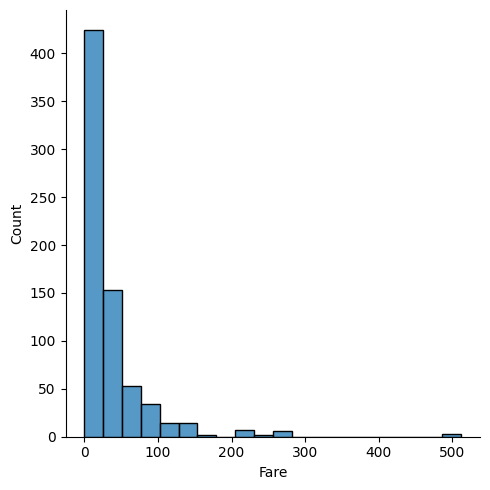

In [ ]:
sns.displot(df_clustering.Fare, bins=20)

## Transform the feature

In [ ]:
enc=sklearn.preprocessing.PowerTransformer()
enc.fit_transform(df_clustering[['Fare']])[:20]

array([[-0.99765031],
       [ 1.28775742],
       [-0.90107255],
       [ 1.02427568],
       [-0.88411158],
       [ 1.00273178],
       [ 0.13202717],
       [-0.53475875],
       [ 0.48661962],
       [-0.10705645],
       [ 0.36394683],
       [-0.88411158],
       [ 0.52494282],
       [-0.91080102],
       [-0.15160295],
       [ 0.45530075],
       [-0.029469  ],
       [ 0.34315814],
       [-0.36978947],
       [-0.88691511]])

## Add the transformed feature into the *df_encoded* dataframe

In [ ]:
df_encoded['Fare']=sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['Fare']])

## Plot histogram of the transformer feature
* 🔎 What has changed?

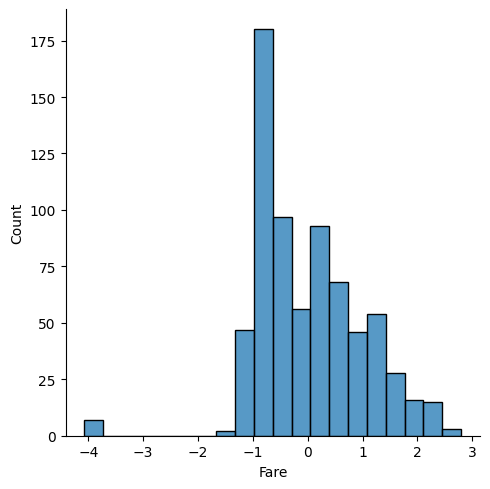

In [ ]:
sns.displot(df_encoded.Fare, bins=20)

## Scale the *Age* using MinMax scaler
* `sklearn.preprocessing.minmax_scale`

In [ ]:
df_encoded['Age']=sklearn.preprocessing.minmax_scale(df_clustering.Age)

## Join the *df_encoded* and *['Survived', 'Pclass', 'SibSp', 'Parch']* features

In [ ]:
df_encoded=df_encoded.join(df_clustering[['Survived','Pclass','SibSp','Parch']])
df_encoded.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,Fare,Age,Survived,Pclass,SibSp,Parch
PassengerId,,,,,,,,,,
1,1.0,False,False,True,-0.997650,0.271174,0,3,1,0
2,0.0,True,False,False,1.287757,0.472229,1,1,1,0
3,0.0,False,False,True,-0.901073,0.321438,1,3,0,0
4,0.0,False,False,True,1.024276,0.434531,1,1,1,0
5,1.0,False,False,True,-0.884112,0.434531,0,3,0,0


# We finally got to the clustering part 😮‍💨

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_04_meme_02.jpg?raw=true)

## There are methods how to identify probable number of clusters in the data
* It is always a rough estimate

## 💡 We can use **Elbow method** to identify potentially ideal number of clusters in our data in **KMeans** algorithm.

There are two basic methods for evaluation of clusters quality:
1. SSE - Sum of squared distances of samples to their closest cluster center, this one is specific for **KMeans** algorithm.
    * You can find it as **inertia_** attribute of KMeans sklearn object.
2. Silhouette Coefficient - calculated using the mean intra-cluster distance and the mean nearest-cluster distance

## 💡 We ussually want to find number of clusters with low SSE and high Silhoutte coef.
- Take a look at [this](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c) and [this](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a) for more details

## Try different number of clusters from range <2, 10> for KMeans algorithm, save both evaluation criteria and plot dependency of criteria to number of clusters.
* We will use `sklearn.cluster.KMeans` class
* The most important parameter is the *n_clusters*
    * What is the *random_state* parameter?

In [ ]:
X = df_encoded.values
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

In [ ]:
df_clustering_scores

,sse,silhouette
k,,
2,2051.762020,0.334082
3,1580.250928,0.364262
4,1360.796955,0.379880
5,1220.122090,0.267616
6,1138.545101,0.248358
7,1043.928558,0.277009
8,1000.976087,0.286154
9,932.731933,0.294794
10,883.114822,0.296287


## Plot the SSE and Silhouette score

<Axes: xlabel='k', ylabel='sse'>

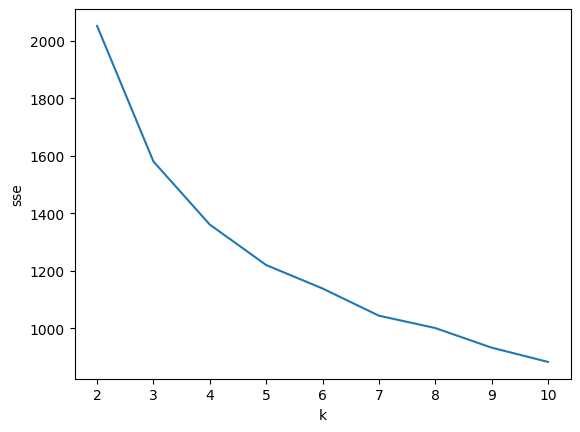

In [ ]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

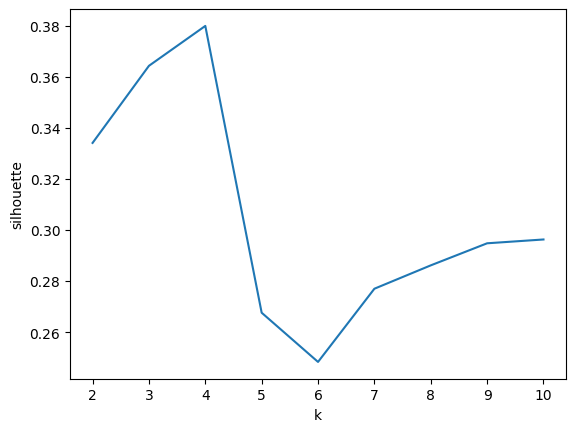

In [ ]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

# 🔎 What is the probable number of clusters in the data?

## Let's try to analyze the data assigned into **4** clusters

In [ ]:
clustering=sklearn.cluster.KMeans(n_clusters=4, random_state=13)
clustering.fit(X)

KMeans(n_clusters=4, random_state=13)

## How big are our clusters? How many 0, 1, .. are in *labels_* property?

In [ ]:
pd.Series(clustering.labels_).value_counts()

,count
0,396
1,229
2,44
3,43


# 📒 Explore clusters
* Try to use cluster information for exploration analysis of our data
    * Create new feature *cluster_id* with the *labels_* property data

In [ ]:
df_clustering['cluster_id']=clustering.labels_
df_clustering.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cluster_id
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0
2,1,1,female,38.0,1,0,71.2833,C,1
3,1,3,female,26.0,0,0,7.9250,S,0
4,1,1,female,35.0,1,0,53.1000,S,1
5,0,3,male,35.0,0,0,8.0500,S,0


## 🚀 Hint: You can use *sns.countplot* as a visual *.value_counts()* method

<Axes: xlabel='cluster_id', ylabel='count'>

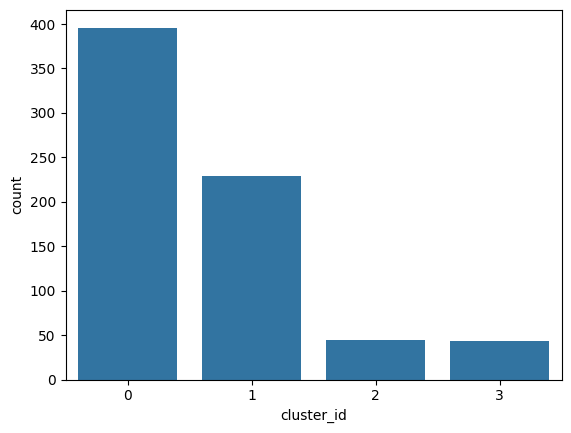

In [ ]:
sns.countplot(data=df_clustering, x='cluster_id')

## 🎯 Create plots showing values of different attributes based on cluster group and describe them
* Let's follow the four example questions about the data to solve the task

### ❓ Questions ❓
1. Is **Fare** different for points in different clusters?
    * 💡 Use *plt.yscale('log')* to take care of the outlier/variance effect
2. Is **Age** different for point in different clusters?
3. Does rate of suvival differ in clusters?
    * *Survived*
4. Does number of passanger of each class differ in clusters?
    * *Pclass*

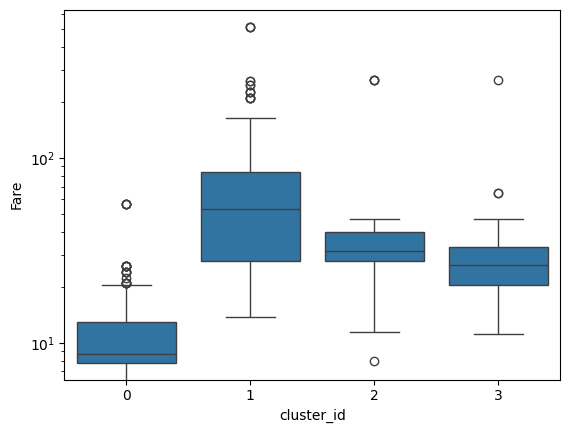

In [ ]:
sns.boxplot(data=df_clustering, x='cluster_id', y='Fare')
plt.yscale('log')

<Axes: xlabel='cluster_id', ylabel='count'>

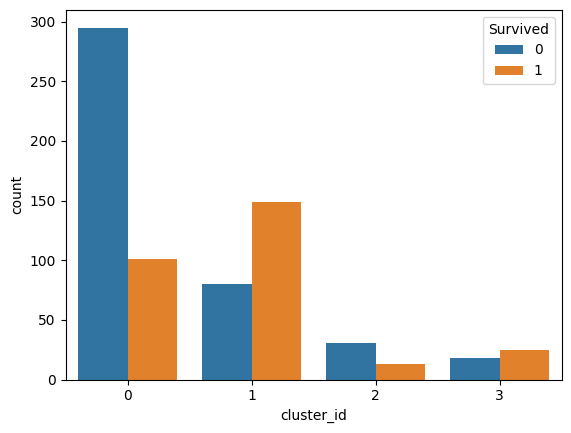

In [ ]:
sns.countplot(data=df_clustering, x='cluster_id', hue='Survived')

<Axes: xlabel='cluster_id', ylabel='count'>

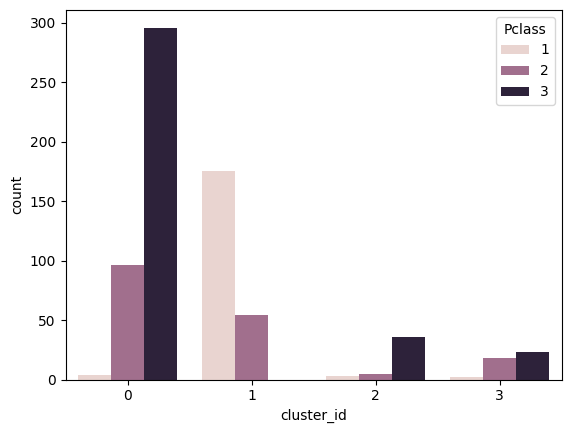

In [ ]:
sns.countplot(data=df_clustering, x='cluster_id', hue='Pclass')

# 📝 Write a textual description of the four clusters

### Cluster 1 - ...
### Cluster 2 - ...
### Cluster 3 - ...
### Cluster 4 - ...

# Is our data represented in the best way?

* **Clustering methods depends on calculation of distance metric among data points in our data matrix.**
* Therefore it is necessary to preproces our data matrix **X** in a best way possible to achive equal distance for every dataset feature.
    * After such transformation we can presume, that difference in *Age* has same impact as the difference as in the *Fare* feature.
* **Generally, it is very hard to create perfect tranformation for our real dataset.**

## Use StandardScaler transformation for our data **X**

In [ ]:
col_names = ['Fare', 'Age', 'SibSp', 'Parch']
enc = sklearn.preprocessing.StandardScaler()
X_stand = pd.DataFrame(enc.fit_transform(df_clustering.loc[:, col_names]), columns = col_names, index=df_clustering.index)
X_stand = pd.concat([X_stand, df_encoded.loc[:, ['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']], df_clustering.Survived], axis=1)

In [ ]:
X_stand

,Fare,Age,SibSp,Parch,Sex,Embarked_C,Embarked_Q,Embarked_S,Survived
PassengerId,,,,,,,,,
1,-0.516380,-0.527669,0.522511,-0.506787,1.0,False,False,True,0
2,0.694046,0.577094,0.522511,-0.506787,0.0,True,False,False,1
3,-0.503620,-0.251478,-0.552714,-0.506787,0.0,False,False,True,1
4,0.350326,0.369951,0.522511,-0.506787,0.0,False,False,True,1
5,-0.501257,0.369951,-0.552714,-0.506787,1.0,False,False,True,0
...,...,...,...,...,...,...,...,...,...
886,-0.102875,0.646142,-0.552714,5.350885,0.0,False,True,False,0
887,-0.407687,-0.182430,-0.552714,-0.506787,1.0,False,False,True,0
888,-0.086335,-0.734812,-0.552714,-0.506787,0.0,False,False,True,1


In [ ]:
X_stand.describe()

,Fare,Age,SibSp,Parch,Sex,Survived
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,712.000000,712.000000
mean,-6.736185e-17,2.943962e-16,-1.496930e-17,1.496930e-17,0.636236,0.404494
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,0.481420,0.491139
min,-6.534272e-01,-2.017717e+00,-5.527137e-01,-5.067874e-01,0.000000,0.000000
25%,-5.012575e-01,-6.657639e-01,-5.527137e-01,-5.067874e-01,0.000000,0.000000
50%,-3.576726e-01,-1.133826e-01,-5.527137e-01,-5.067874e-01,1.000000,0.000000
75%,-2.962586e-02,5.770939e-01,5.225108e-01,6.647471e-01,1.000000,1.000000
max,9.031168e+00,3.477095e+00,4.823409e+00,6.522419e+00,1.000000,1.000000


# ✅ Task (2p)
1. Use **KMeans** to differently preprocessed data matrix **X_stand**
2. Detect "ideal" number of clusters using Elbow method
3. Explore detected clusters and **describe** them to the Markdown cell
    * **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
        * ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

In [ ]:
X_stand_values = X_stand.values

clustering_scores_stand = []
for k in range(2, 11):
    clustering_stand = sklearn.cluster.KMeans(n_clusters=k, random_state=10).fit(X_stand_values)
    clustering_scores_stand.append({
        'k': k,
        'sse': clustering_stand.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X_stand_values, clustering_stand.labels_)
    })
df_clustering_scores_stand = pd.DataFrame.from_dict(clustering_scores_stand, orient='columns')
df_clustering_scores_stand = df_clustering_scores_stand.set_index('k')


<Axes: xlabel='k', ylabel='sse'>

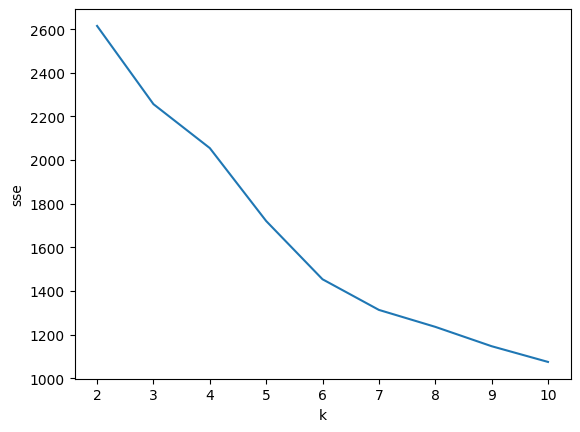

In [ ]:
sns.lineplot(data = df_clustering_scores_stand, y='sse', x='k')


<Axes: xlabel='k', ylabel='silhouette'>

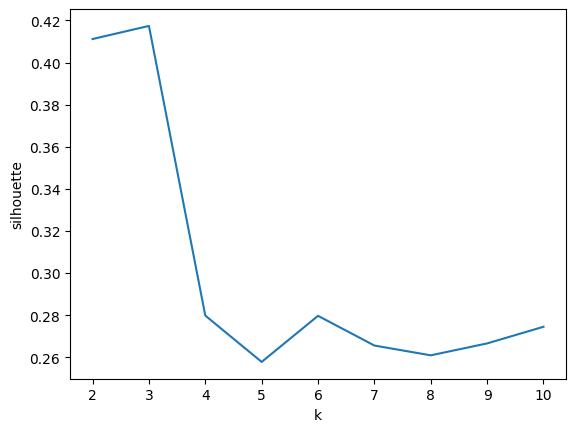

In [ ]:
sns.lineplot(data = df_clustering_scores_stand, y='silhouette', x='k')


In [ ]:
clustering_stand=sklearn.cluster.KMeans(n_clusters=3, random_state=13)
clustering_stand.fit(X_stand.values)

KMeans(n_clusters=3, random_state=13)

In [ ]:
df_clustering['cluster_id_stand']=clustering.labels_
df_clustering.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cluster_id,cluster_id_stand
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,0
2,1,1,female,38.0,1,0,71.2833,C,2,2
3,1,3,female,26.0,0,0,7.9250,S,0,0
4,1,1,female,35.0,1,0,53.1000,S,0,0
5,0,3,male,35.0,0,0,8.0500,S,0,0


<Axes: xlabel='cluster_id_stand', ylabel='count'>

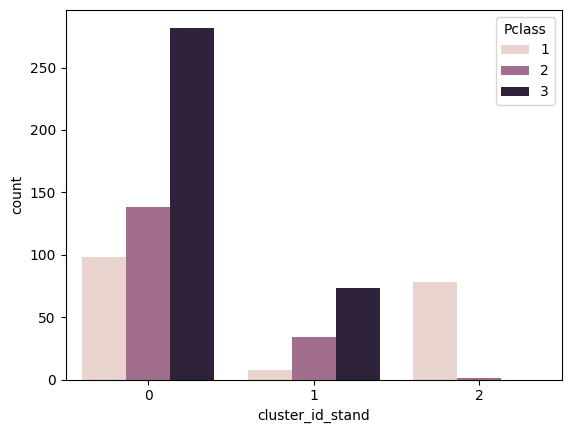

In [ ]:
sns.countplot(data=df_clustering, x='cluster_id_stand', hue='Pclass')

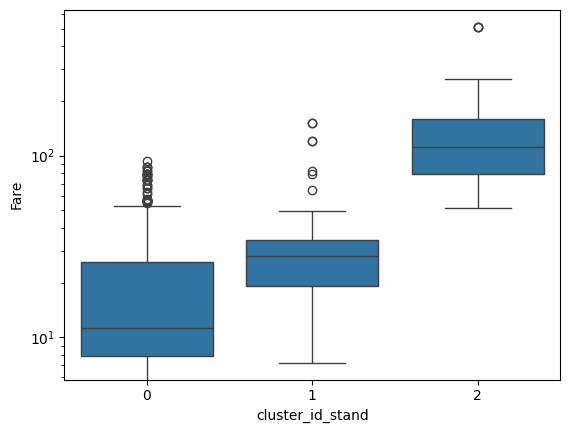

In [ ]:
sns.boxplot(data=df_clustering, x='cluster_id_stand', y='Fare')
plt.yscale('log')

<Axes: xlabel='cluster_id_stand', ylabel='count'>

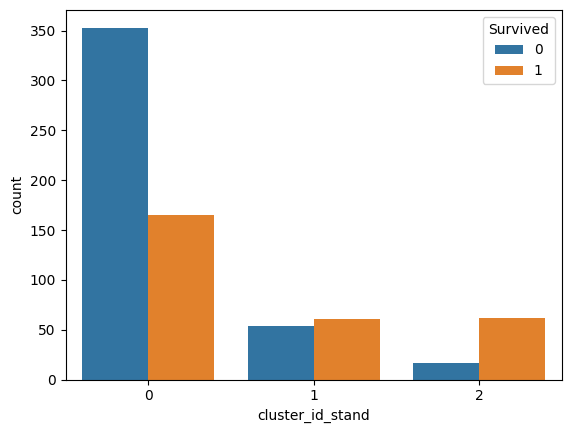

In [ ]:
sns.countplot(data=df_clustering, x='cluster_id_stand', hue='Survived')

<Axes: xlabel='cluster_id_stand', ylabel='count'>

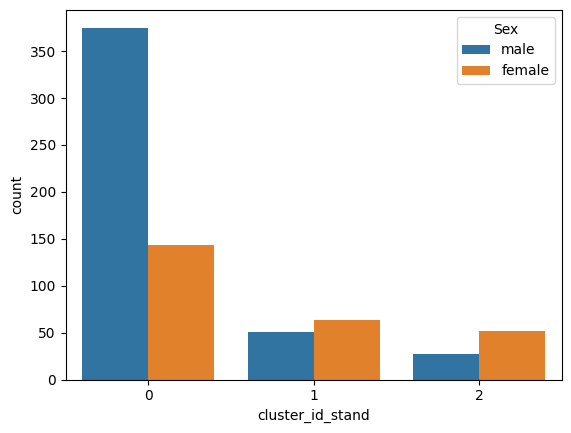

In [ ]:
sns.countplot(data=df_clustering, x='cluster_id_stand', hue='Sex')